--- Análise da Disponibilidade de Água Potável ---
Determinação da curva y = a * e^(bx):
  Coeficiente 'a': 383.6252
  Coeficiente 'b': -1.2476
  A equação da curva é aproximadamente: y = 383.6252 * e^(-1.2476x)
------------------------------------------------------------
Estimativa da disponibilidade de água para o ano 2020 (onde x = 3):
  y(3) = 9.0873 (em 1000 m³ por habitante)
------------------------------------------------------------
Valor para preenchimento da resposta (aproximadamente): 9.09
------------------------------------------------------------


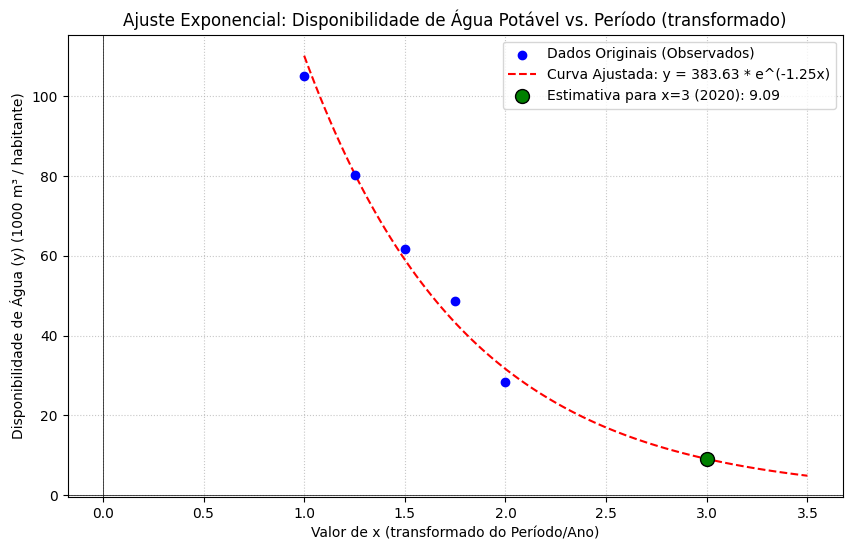

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# --- Questão 2: Disponibilidade de Água Potável ---

# Dados fornecidos conforme a Questão 2 e DICA (1)
# Valores de x (transformados dos anos 1950, 1960, 1970, 1980, 2000)
x_valores_originais = np.array([1.00, 1.25, 1.50, 1.75, 2.00])
# Valores de y (Disponibilidade da água em 1000 m³)
y_valores_originais = np.array([105.0, 80.2, 61.7, 48.8, 28.3])

# Para ajustar o modelo y = a * e^(bx), linearizamos tomando o logaritmo natural:
# ln(y) = ln(a) + b*x
# Esta é uma equação linear da forma Y = C + b*X, onde Y = ln(y), C = ln(a), X = x.

# Calcular ln(y)
ln_y_valores = np.log(y_valores_originais)

# Realizar a regressão linear para encontrar 'b' (coeficiente angular) e 'ln_a' (intercepto linear)
coeficientes_regressao = np.polyfit(x_valores_originais, ln_y_valores, 1)
b_coef = coeficientes_regressao[0]
ln_a_coef = coeficientes_regressao[1]

# Calcular 'a' a partir de ln_a
a_coef = np.exp(ln_a_coef)

# Apresentar os coeficientes da curva determinada
print("--- Análise da Disponibilidade de Água Potável ---")
print("Determinação da curva y = a * e^(bx):")
print(f"  Coeficiente 'a': {a_coef:.4f}")
print(f"  Coeficiente 'b': {b_coef:.4f}")
print(f"  A equação da curva é aproximadamente: y = {a_coef:.4f} * e^({b_coef:.4f}x)")
print("-" * 60)

# Estimar a disponibilidade de água para 2020, onde x = 3
x_para_2020 = 3
y_estimado_2020 = a_coef * np.exp(b_coef * x_para_2020)

# Apresentar a estimativa para 2020 (x=3)
print(f"Estimativa da disponibilidade de água para o ano 2020 (onde x = {x_para_2020}):")
print(f"  y({x_para_2020}) = {y_estimado_2020:.4f} (em 1000 m³ por habitante)")
print("-" * 60)

# A resposta para preencher o campo "Resposta para a questão. 2020 (x=3): _______"
print(f"Valor para preenchimento da resposta (aproximadamente): {y_estimado_2020:.2f}")
print("-" * 60)

# --- Geração do Gráfico ---
plt.figure(figsize=(10, 6))

# Plotar os dados originais
plt.scatter(x_valores_originais, y_valores_originais, color='blue', label='Dados Originais (Observados)', zorder=5)

# Criar uma sequência de valores de x para plotar a curva ajustada
# Incluindo o ponto de extrapolação x=3
x_para_curva = np.linspace(min(x_valores_originais), x_para_2020 + 0.5, 100) # Estende um pouco além de x=3
y_curva_ajustada = a_coef * np.exp(b_coef * x_para_curva)

# Plotar a curva exponencial ajustada
plt.plot(x_para_curva, y_curva_ajustada, color='red', linestyle='--', label=f'Curva Ajustada: y = {a_coef:.2f} * e^({b_coef:.2f}x)')

# Plotar o ponto estimado para x=3
plt.scatter([x_para_2020], [y_estimado_2020], color='green', s=100, edgecolor='black', label=f'Estimativa para x=3 (2020): {y_estimado_2020:.2f}', zorder=6)

# Configurações do gráfico
plt.xlabel('Valor de x (transformado do Período/Ano)')
plt.ylabel('Disponibilidade de Água (y) (1000 m³ / habitante)')
plt.title('Ajuste Exponencial: Disponibilidade de Água Potável vs. Período (transformado)')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.7)
plt.axhline(0, color='black', linewidth=0.5) # Linha do eixo x
plt.axvline(0, color='black', linewidth=0.5) # Linha do eixo y (se aplicável ao range)

# Mostrar o gráfico
plt.show()